<font size = 3>主成分分析法（Principal Component Analysis，PCA）也是一种经典的无监督学习算法。PCA通过正交变换将一组由线性相关变量表示的数据转换为少数几个由线性无关变量表示的数据，这几个线性无关的变量就是主成分。PCA通过将高维数据维度减少到少数几个维度，本质上属于一种数据降维方法，也可以用来探索数据的内在结构。

<font size = 3>PCA使用方差来衡量新变量的信息量大小，按照方差大小排序依次为第一主成分、第二主成分等。

In [2]:
import numpy as np

class PCA():
    # 计算协方差矩阵
    def calculate_covariance_matrix(self, X):
        m = X.shape[0]
        # 数据标准化
        X = X - np.mean(X, axis=0)
        return 1 / m * np.matmul(X.T, X) # 两个numpy数组的矩阵相乘

    def pca(self, X, n_components):
        # 计算协方差矩阵
        covariance_matrix = self.calculate_covariance_matrix(X)
        # 计算协方差矩阵的特征值和对应特征向量
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        # 对特征值排序
        idx = eigenvalues.argsort()[::-1]
        # 取最大的前n_component组
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components] #取最大的前n个
        # Y=PX转换
        return np.matmul(X, eigenvectors) #X是1700×20，后面是20×20中选前2的，即20×2的，最后得到1700×2的实现降维

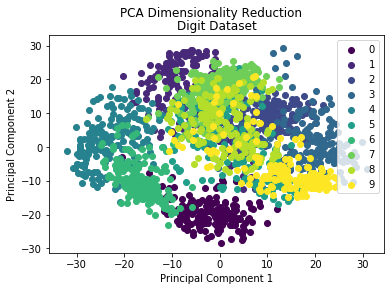

In [3]:

from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

# 导入sklearn数据集
data = datasets.load_digits()
X = data.data
y = data.target

# 将数据降维到2个主成分
X_trans = PCA().pca(X, 2)
x1 = X_trans[:, 0]
x2 = X_trans[:, 1]

# 绘图展示
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

class_distr = []
# 绘制不同类别分别
for i, l in enumerate(np.unique(y)):
    _x1 = x1[y == l]
    _x2 = x2[y == l]
    _y = y[y == l]
    class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

# 图例
plt.legend(class_distr, y, loc=1)

# 坐标轴
plt.suptitle("PCA Dimensionality Reduction")
plt.title("Digit Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show();

In [7]:
X.shape

(1797, 64)

In [6]:
X_trans.shape

(1797, 2)

# SVD

In [25]:
import numpy as np
# 创建一个矩阵A
A = np.array([[0,1],[1,1],[1,0]]) #就是因为横纵列数不一样，所以才会用SVD，按少的数算s和v的维数
# 对其进行SVD分解
u, s, vt = np.linalg.svd(A, full_matrices=True)#     u:左奇异矩阵，v:右奇异矩阵，s:奇异值矩阵
print(u.shape, s.shape, vt.shape)

(3, 3) (2,) (2, 2)


In [26]:
# 由u,s,v恢复矩阵A
np.dot(u[:,:2]*s, vt)

array([[ 1.11022302e-16,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -3.33066907e-16]])

In [21]:
import numpy as np
import os
from PIL import Image
from tqdm import tqdm
# 使用前50个奇异值
K = 50 
# 定义恢复函数，由分解后的矩阵恢复到原矩阵
def restore(u, s, v, K): 
    '''
    u:左奇异矩阵
    v:右奇异矩阵
    s:奇异值矩阵
    K:奇异值个数
    '''
    m, n = len(u), len(v[0])
    a = np.zeros((m, n))
    for k in range(K):
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
    # 前k个奇异值的加总
        a += s[k] * np.dot(uk, vk)   
        a = a.clip(0, 255)
    return np.rint(a).astype('uint8')
A = np.array(Image.open("./kobe.jpg", 'r'))
# 对RGB图像进行奇异值分解
u_r, s_r, v_r = np.linalg.svd(A[:, :, 0])     #三个通道的数据
u_g, s_g, v_g = np.linalg.svd(A[:, :, 1])
u_b, s_b, v_b = np.linalg.svd(A[:, :, 2])


output_path = r'./svd_pic'
# 恢复图像
for k in tqdm(range(1, K+1)):
    R = restore(u_r, s_r, v_r, k)
    G = restore(u_g, s_g, v_g, k)
    B = restore(u_b, s_b, v_b, k)
    I = np.stack((R, G, B), axis=2)   
    Image.fromarray(I).save('%s\\svd_%d.jpg' % (output_path, k))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:38<00:00,  1.31it/s]


![title](svd_pic\svd_1.jpg)
![title](svd_pic\svd_10.jpg)
![title](svd_pic\svd_20.jpg)
![title](svd_pic\svd_30.jpg)
![title](svd_pic\svd_40.jpg)